In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') # Warnings

In [3]:
names_df = pd.read_csv('Data/name.basics.tsv', sep='\t')
basics_df = pd.read_csv('Data/title.basics.tsv', sep='\t')
ratings_df = pd.read_csv('Data/title.ratings.tsv', sep='\t')

In [4]:
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


In [5]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2064
1,tt0000002,5.6,279
2,tt0000003,6.5,2038
3,tt0000004,5.4,180
4,tt0000005,6.2,2799


In [140]:
basics_ratings_df = basics_df.merge(ratings_df, how='inner', on='tconst')

In [141]:
basics_ratings_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2064
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.6,279
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation",6.5,2038
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,180
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2799


In [142]:
basics_ratings_df.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [144]:
basics_ratings_df.describe()

,averageRating,numVotes
count,1.463609e+06,1.463609e+06
mean,6.953515e+00,1.029583e+03
std,1.378958e+00,1.770012e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.000000e+02
max,1.000000e+01,2.920364e+06


In [219]:
movies_df = basics_ratings_df[basics_ratings_df.titleType == 'movie']

In [220]:
movies_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,212
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport",5.2,520
339,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.2,18
373,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.0,917
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.1,27


In [222]:
movies_df.groupby('genres')['averageRating'].mean().sort_values(ascending=False).head(15)

genres
Biography,Comedy,War             9.20
Documentary,News,Reality-TV      8.90
Documentary,Music,Sci-Fi         8.70
Comedy,Drama,Talk-Show           8.60
Documentary,Musical,Thriller     8.50
Action,Biography,Fantasy         8.40
Family,Music,Sport               8.40
Action,Documentary,Mystery       8.30
Animation,Crime,Documentary      8.30
Comedy,Mystery,Sport             8.20
Documentary,Family,Reality-TV    8.20
Reality-TV,Sport                 8.20
Crime,Family,Musical             8.15
Action,Animation,Thriller        8.10
Animation,Fantasy,War            8.00
Name: averageRating, dtype: float64

In [223]:
movies_df.groupby('genres')['averageRating'].mean().sort_values(ascending=True).head(15)

genres
Documentary,Mystery,Reality-TV    1.400000
Music,Sci-Fi,Thriller             1.500000
History,Sci-Fi,Thriller           2.400000
Animation,Comedy,War              2.500000
Comedy,Sport,War                  2.600000
Comedy,Drama,Game-Show            2.900000
Action,Adult,Fantasy              2.900000
Comedy,History,Horror             3.200000
Animation,Crime,Sci-Fi            3.200000
Drama,Reality-TV                  3.350000
Fantasy,Sci-Fi,Western            3.500000
Horror,Sci-Fi,Western             3.550000
Adventure,Sci-Fi,Western          3.600000
Drama,Sci-Fi,Western              3.666667
Fantasy,Musical,Western           3.700000
Name: averageRating, dtype: float64

In [294]:
def obj_to_int(x: str) -> int:
    x = int(x)
    return x

In [295]:
movies_df = movies_df[~(movies_df.runtimeMinutes == '\\N')]

In [296]:
movies_df.runtimeMinutes = movies_df.runtimeMinutes.apply(obj_to_int)

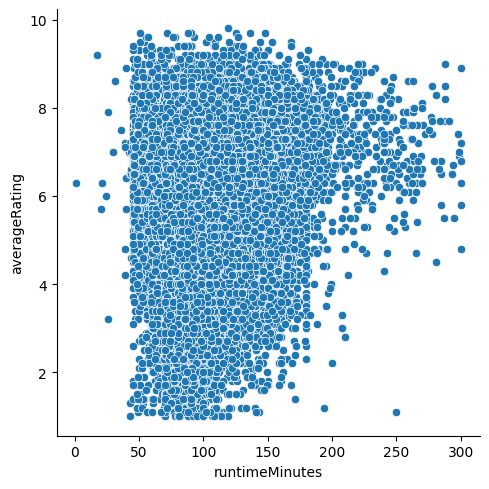

In [297]:
sns.relplot(data=movies_df, x='runtimeMinutes', y='averageRating')

In [236]:
movies_df = movies_df[~(movies_df.runtimeMinutes > 300)]

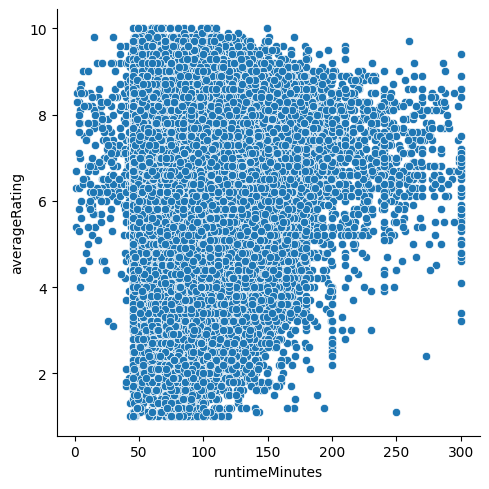

In [237]:
sns.relplot(data=movies_df, x='runtimeMinutes', y='averageRating')

In [238]:
movies_df = movies_df.drop(['endYear'], axis=1)

In [240]:
movies_df = movies_df.drop(['originalTitle'], axis=1)

In [243]:
movies_df = movies_df[~(movies_df.startYear  == '\\N')]

In [245]:
def year_to_decade(x: str) -> str:
    x = x[0:3] + '0'
    return x

In [246]:
movies_df['decade'] = movies_df.startYear.apply(year_to_decade)

In [247]:
movies_df['decade'].unique()

array(['1890', '1900', '1910', '1930', '1920', '2020', '2000', '1990',
       '1940', '1950', '1960', '1980', '1970', '2010'], dtype=object)

In [248]:
movies_df.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,decade
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance,5.4,212,1890
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",5.2,520,1890
339,tt0000502,movie,Bohemios,0,1905,100,\N,4.2,18,1900
373,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.0,917,1900
383,tt0000591,movie,The Prodigal Son,0,1907,90,Drama,5.1,27,1900


In [249]:
# movies_df.to_csv('movies_df_cleaned.csv')
# don't want to save another file but don't want to get rid of the code

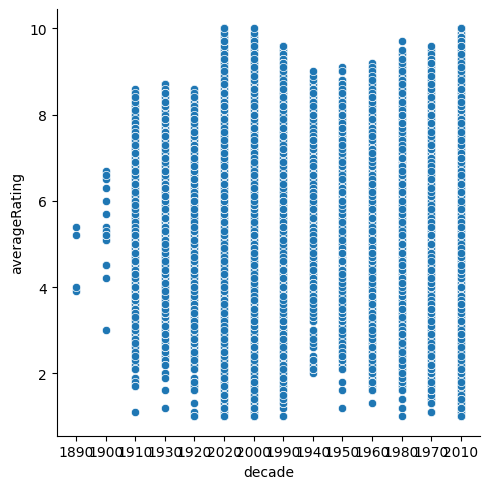

In [250]:
sns.relplot(data=movies_df, x='decade', y='averageRating')

In [252]:
movies_df = movies_df[movies_df.numVotes > 99]

In [254]:
movies_df = movies_df[~(movies_df.genres  == '\\N')]
movies_df = movies_df[~(movies_df.averageRating  == '\\N')]
movies_df = movies_df[~(movies_df.numVotes  == '\\N')]

In [256]:
def first_genre(x:str) -> str:
    genre = x.split(',')[0]
    return genre

In [257]:
movies_df['genre'] = movies_df.genres.apply(first_genre)

In [258]:
movies_df.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,decade,genre
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance,5.4,212,1890,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",5.2,520,1890,Documentary
373,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.0,917,1900,Action
961,tt0001892,movie,Den sorte drøm,0,1911,53,Drama,5.8,270,1910,Drama
979,tt0001964,movie,The Traitress,0,1911,48,Drama,6.0,102,1910,Drama


In [259]:
movies_df = movies_df.drop(['genres'], axis=1)

In [261]:
# movies_df.to_csv('movies_df_cleaned2.csv')

In [262]:
movies_df.genre.unique()

array(['Romance', 'Documentary', 'Action', 'Drama', 'Adventure',
       'Biography', 'History', 'Crime', 'Western', 'Comedy', 'Horror',
       'Fantasy', 'Family', 'Mystery', 'Sci-Fi', 'Thriller', 'Music',
       'Musical', 'Film-Noir', 'War', 'Animation', 'Sport', 'Adult',
       'Reality-TV', 'Talk-Show', 'News'], dtype=object)

In [263]:
movies_df = movies_df.drop(['titleType'], axis=1)
movies_df.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,decade,genre
8,tt0000009,Miss Jerry,0,1894,45,5.4,212,1890,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,0,1897,100,5.2,520,1890,Documentary
373,tt0000574,The Story of the Kelly Gang,0,1906,70,6.0,917,1900,Action
961,tt0001892,Den sorte drøm,0,1911,53,5.8,270,1910,Drama
979,tt0001964,The Traitress,0,1911,48,6.0,102,1910,Drama


<Axes: xlabel='decade', ylabel='count'>

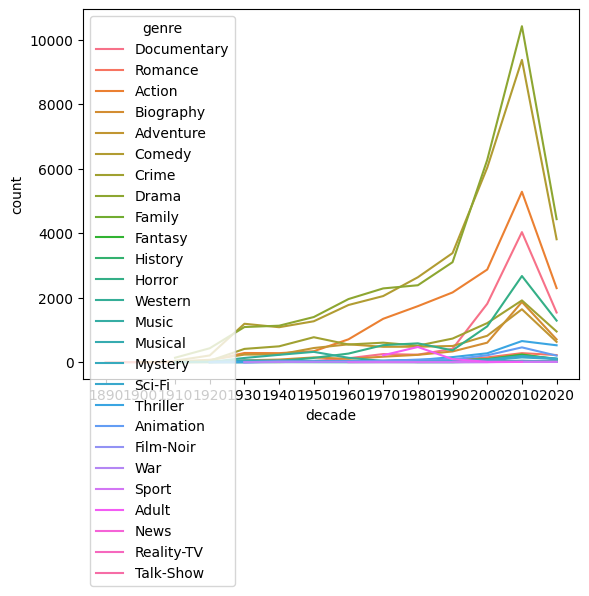

In [269]:
sns.lineplot(
    data=movies_df.groupby(['decade', 'genre']).size().reset_index(name='count'), x='decade', y='count', hue='genre'
)

In [270]:
movies_df.groupby('genre').size()

genre
Action         17393
Adult            805
Adventure       6127
Animation       1144
Biography       4332
Comedy         32860
Crime           8228
Documentary     8532
Drama          35053
Family           639
Fantasy          648
Film-Noir         34
History          108
Horror          7036
Music             96
Musical          266
Mystery          686
News               1
Reality-TV         4
Romance          826
Sci-Fi           458
Sport             24
Talk-Show          1
Thriller        1790
War               97
Western          959
dtype: int64

In [271]:
movies_df = movies_df[~(movies_df.genre.isin(['War', 'Talk-Show', 'Sport', 'Reality-TV', 'News', 'Music', 'History', 'Film-Noir']))]

In [283]:
movies_df.genre = movies_df.genre.replace(['Thriller', 'Adventure', 'Crime'], 'Action')

In [284]:
movies_df.genre = movies_df.genre.replace(['Sci-Fi', 'Fantasy'], 'Sci-Fi Fantasy')

In [285]:
movies_df.genre = movies_df.genre.replace(['Biography'], 'Documentary')

In [286]:
movies_df.groupby('genre').size()

genre
Action            33538
Adult               805
Animation          1144
Comedy            32860
Documentary       12864
Drama             35053
Family              639
Horror             7036
Musical             266
Mystery             686
Romance             826
Sci-Fi Fantasy     1106
Western             959
dtype: int64

<Axes: xlabel='decade', ylabel='count'>

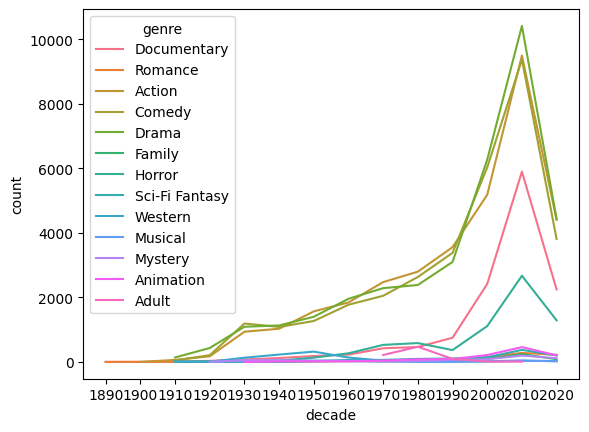

In [287]:
sns.lineplot(
    data=movies_df.groupby(['decade', 'genre']).size().reset_index(name='count'), x='decade', y='count', hue='genre'
)

In [304]:
movies_df.startYear = movies_df.startYear.apply(obj_to_int)

<Axes: xlabel='startYear', ylabel='count'>

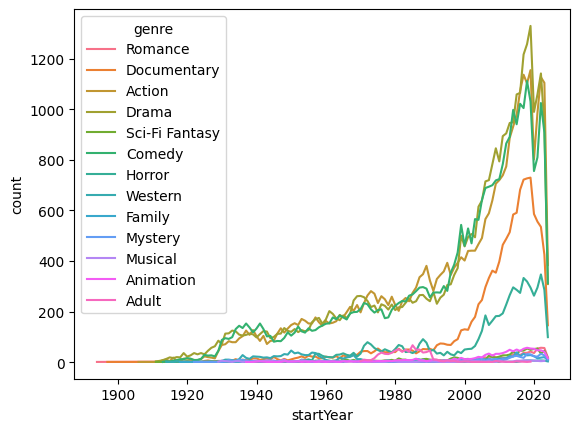

In [305]:
sns.lineplot(
    data=movies_df.groupby(['startYear', 'genre']).size().reset_index(name='count'), x='startYear', y='count', hue='genre'
)

In [309]:
movies_df.isAdult = movies_df.isAdult.apply(obj_to_int)

In [326]:
movies_df.groupby('decade')['isAdult'].sum()

decade
1890      0
1900      0
1910      0
1920      0
1930      0
1940      0
1950      0
1960      1
1970    234
1980    481
1990    110
2000     18
2010     13
2020      0
Name: isAdult, dtype: int64

In [327]:
movies_df.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,decade,genre,fiveYear,startYearInt
8,tt0000009,Miss Jerry,0,1894,45,5.4,212,1890,Romance,1890,1894
144,tt0000147,The Corbett-Fitzsimmons Fight,0,1897,100,5.2,520,1890,Documentary,1895,1897
373,tt0000574,The Story of the Kelly Gang,0,1906,70,6.0,917,1900,Action,1905,1906
961,tt0001892,Den sorte drøm,0,1911,53,5.8,270,1910,Drama,1910,1911
979,tt0001964,The Traitress,0,1911,48,6.0,102,1910,Drama,1910,1911


In [328]:
movies_df = movies_df.drop(['fiveYear', 'isAdult'], axis=1)

In [329]:
movies_df

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes,decade,genre,startYearInt
8,tt0000009,Miss Jerry,1894,45,5.4,212,1890,Romance,1894
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,5.2,520,1890,Documentary,1897
373,tt0000574,The Story of the Kelly Gang,1906,70,6.0,917,1900,Action,1906
961,tt0001892,Den sorte drøm,1911,53,5.8,270,1910,Drama,1911
979,tt0001964,The Traitress,1911,48,6.0,102,1910,Drama,1911
...,...,...,...,...,...,...,...,...,...
1463526,tt9914942,Life Without Sara Amat,2019,74,6.6,216,2010,Drama,2019
1463528,tt9914972,Blind Ambition,2021,96,7.1,307,2020,Documentary,2021
1463567,tt9916190,Safeguard,2020,95,3.6,258,2020,Action,2020
1463574,tt9916270,Il talento del calabrone,2020,84,5.8,1491,2020,Action,2020


In [330]:
movies_df.to_csv('movies_df_cleaned3.csv')

In [331]:
movies_df.head()

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes,decade,genre,startYearInt
8,tt0000009,Miss Jerry,1894,45,5.4,212,1890,Romance,1894
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,5.2,520,1890,Documentary,1897
373,tt0000574,The Story of the Kelly Gang,1906,70,6.0,917,1900,Action,1906
961,tt0001892,Den sorte drøm,1911,53,5.8,270,1910,Drama,1911
979,tt0001964,The Traitress,1911,48,6.0,102,1910,Drama,1911


In [334]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127782 entries, 8 to 1463578
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          127782 non-null  object 
 1   primaryTitle    127782 non-null  object 
 2   startYear       127782 non-null  int64  
 3   runtimeMinutes  127782 non-null  int64  
 4   averageRating   127782 non-null  float64
 5   numVotes        127782 non-null  int64  
 6   decade          127782 non-null  object 
 7   genre           127782 non-null  object 
 8   startYearInt    127782 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 13.8+ MB
